In [1]:
from bandit import AgentBandit
from models.classification import Classification
from models.regression import Regression
from sklearn import preprocessing

import numpy as np
import pandas as pd
import torch.nn as nn
import utils.datasets as DB

In [2]:
datasets = DB.Datasets()
datasets.download_UCI()

2023-03-01 20:34:02,009 [INFO] Folder for UCI Mushroom found in the data folder. If the files are corrupted please delete the folder at location ../data/UCI_Mushroom and re-run this command


In [3]:
col_names = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
         'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
         'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
         'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']
mushrooms = pd.read_csv('data/UCI_Mushroom/agaricus-lepiota.data', header=None, names=col_names)

labels = mushrooms.pop(mushrooms.columns[0]).to_numpy()
context = mushrooms.copy()

In [4]:
context.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surf-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Make labels numerical
le = preprocessing.LabelEncoder()
labels_numerical = le.fit_transform(labels)

# Make each feature numerical
for colname in context:
    le = preprocessing.LabelEncoder()
    context[colname] = le.fit_transform(context[colname])
context_numerical = context.to_numpy()
print(context_numerical.shape)

(8124, 22)


In [116]:
agent_args = {
        'model_class'    : Regression, 
        'model_name'     : 'test_rl',
        'input_dim'      : 22+2,
        'output_dim'     : 1,
        'hl_type'        : nn.Linear,
        'hl_units'       : 100,
        'batch_size'     : 64,
        'buffer_size'    : 4096,
        'scheduler'      : None,
        'data_contexts'  : context_numerical,
        'data_labels'    : labels_numerical,
        'training_steps' : 64,
        'n_samples'      : 1,
        'epsilon'        : 0.1,
        'learning_rate'  : 0.001
}

In [117]:
agent = AgentBandit(**agent_args)
loss = []

In [122]:
for epoch in range(10000):
    mushroom = np.random.randint(0, len(labels))
    #print("epoch", epoch)
    l = agent.learn(mushroom)
    loss.append(np.float64(l))

pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])
pred torch.Size([64, 1])


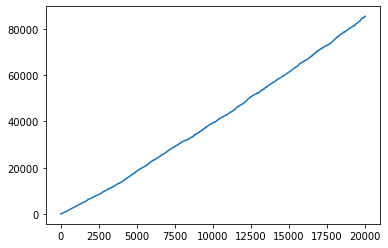

In [145]:
import matplotlib.pyplot as plt
plt.plot(agent.cum_regret)
plt.show()
#avg_vec = [np.mean(agent.cum_regret[:i]) for i in range(1, len(agent.cum_regret)+1)]
#plt.plot(avg_vec)
#plt.show()
#print(agent.cum_regret[:10])
#print(avg_vec[:10])

[0.24691138888864206, 0.2491553139500261, 0.24676849541738277, 0.2548732590462518, 0.24536573887684154, 0.25380122280459094, 0.2499384348769264, 0.2513466743310214, 0.2511203843084924, 0.25317085436472575]


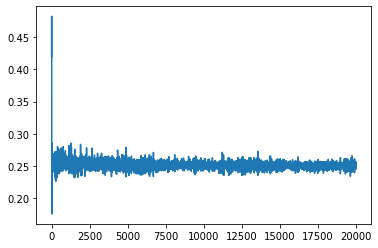

In [125]:
plt.plot(loss)
print(loss[-10:])

In [121]:
list(agent.model.parameters())[0]

Parameter containing:
tensor([[ 0.1389, -0.1195,  0.0257,  ..., -0.1987, -0.0083, -0.1442],
        [ 0.0140, -0.1287, -0.0431,  ...,  0.0982, -0.1893, -0.1192],
        [ 0.1448, -0.0155,  0.0500,  ..., -0.0634, -0.1186, -0.1268],
        ...,
        [-0.0621,  0.1078, -0.1106,  ...,  0.0292,  0.1096,  0.0092],
        [-0.0584,  0.1629, -0.0163,  ..., -0.1823, -0.0765, -0.0824],
        [ 0.0443, -0.0246, -0.0731,  ...,  0.1088,  0.0518,  0.0887]],
       dtype=torch.float64, requires_grad=True)

In [123]:
list(agent.model.parameters())[0]

Parameter containing:
tensor([[ 0.1379, -0.1202,  0.0242,  ..., -0.1992, -0.0083, -0.1444],
        [ 0.0140, -0.1287, -0.0431,  ...,  0.0982, -0.1893, -0.1192],
        [ 0.1407, -0.0165,  0.0472,  ..., -0.0651, -0.1182, -0.1270],
        ...,
        [-0.0639,  0.1081, -0.1122,  ...,  0.0296,  0.1102,  0.0087],
        [-0.0599,  0.1619, -0.0181,  ..., -0.1827, -0.0766, -0.0828],
        [ 0.0443, -0.0246, -0.0731,  ...,  0.1088,  0.0518,  0.0887]],
       dtype=torch.float64, requires_grad=True)